Because this paper specifically investigates strangers vs friends, we want to ensure that all dyads from the round-robin dataset were actually strangers. 

Conversation partners in this dataser were assigned by an experimenter. To ensure that participants did not know each other we asked them “How well did you know your study partner before today?” (0 = Not well at all, 50 = Moderately well, and 100 = Extremely well). 

In order to limit our analyses to true strangers who do not know each other, we excluded 61 dyads where both dyad members indicated a response greater than 0 on this question. The analyses reported in this paper come from 261 stranger dyads. However, note that results are similar with all dyads included. 

This script identifies the true stranger dyads and copies their data from the 'round_robin' folder to the 'strangers_pure' folder.

In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

In [5]:
data = pd.read_csv(os.path.join(base_dir, 'Data', 'post_convo_survey', 
                                'strangers', 'data_common_questions.csv'))       


(array([516.,  28.,  19.,  15.,   8.,  23.,  12.,   9.,   8.,   6.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

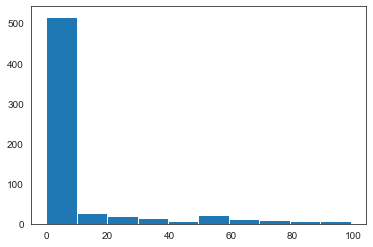

In [6]:
plt.hist(data['knew_before'])

### Exclude dyads where both people endorsed knowing their partner

In [7]:
dyads = []

for i in data['dyad'].unique():
    
    data_subset = data.loc[data['dyad'] == i].reset_index(drop=True)
    data_knew_before = data_subset.loc[data_subset['knew_before'] > 0].reset_index(drop=True)
    if len(data_knew_before) == 2:
        dyads.append(i)
        
print(len(dyads))
print(round((len(dyads) / 322)*100,2))

61
18.94


# Create a new folder of stranger turn-taking data

Limiting it to the "true" strangers

Make a subset of data to the pure strangers. Create a filename by joining subID and partnerID. Check to see if that file exists in the turn_taking folder. If it does, copy it to the other folder.

In [ ]:
pure_strangers = data.loc[~data['dyad'].isin(dyads)].reset_index(drop=True)

for i in range(len(pure_strangers)):
    file_name = str(pure_strangers.at[i, 'subID']) + '_' + str(pure_strangers.at[i, 'partnerID'])
    
    path_to_file_original = os.path.join(base_dir, 'Analyses', 'turn_taking', 'round_robin', '{}.csv'.format(file_name))
    
    if os.path.exists(path_to_file_original):
        path_to_file_copy = os.path.join(base_dir, 'Analyses', 'turn_taking', 'strangers_pure', '{}.csv'.format(file_name))
        shutil.copyfile(path_to_file_original, path_to_file_copy)
        